In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('Fraud_check.csv')
dataset.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
label_encoder = preprocessing.LabelEncoder()
dataset['Undergrad']=label_encoder.fit_transform(dataset['Undergrad'])

dataset['Urban']=label_encoder.fit_transform(dataset['Urban'])
dataset['Marital.Status']=label_encoder.fit_transform(dataset['Marital.Status'])

In [4]:
dataset = dataset.rename(columns={'Taxable.Income': 'Taxable_Income'})

In [5]:
x=dataset.iloc[:,0:5]
y=dataset['Taxable_Income']
x

,Undergrad,Marital.Status,Taxable_Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28
...,...,...,...,...,...
595,1,0,76340,39492,7
596,1,0,69967,55369,2
597,0,0,47334,154058,0
598,1,1,98592,180083,17


In [6]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: Taxable_Income, Length: 600, dtype: int64

In [7]:
dataset['Taxable_Income'].unique()

array([68833, 33700, 36925, 50190, 81002, 33329, 83357, 62774, 83519,
       98152, 29732, 61063, 11794, 61830, 64070, 69869, 24987, 39476,
       97957, 10987, 88636, 14310, 78969, 92040, 38239, 31417, 55299,
       87778, 10379, 94033, 73854, 64007, 97200, 82071, 12514, 31336,
       10163, 68513, 14912, 74010, 50777, 49436, 96485, 70339, 33614,
       81079, 31532, 44034, 16264, 45706, 79616, 40137, 97703, 21917,
       81939, 19925, 34703, 78573, 10870, 65065, 94418, 26972, 91684,
       51685, 62158, 58312, 42507, 61486, 10150, 99619, 89302, 94287,
       41344, 41382, 32434, 61105, 67628, 31458, 73411, 10329, 44947,
       35610, 66564, 87348, 69098, 28449, 39277, 13747, 86652, 26741,
       77634, 99325, 85651, 15296, 10348, 41395, 22258, 79583, 22187,
       52495, 93078, 35072, 32662, 89250, 41641, 55873, 19169, 46629,
       51927, 69224, 24557, 77762, 96355, 90910, 21945, 79357, 42784,
       54638, 29944, 97318, 52022, 20391, 21016, 26679, 70682, 87326,
       15853, 75501,

In [8]:
dataset.Taxable_Income.value_counts()

59689    2
68833    1
60822    1
93090    1
79373    1
        ..
61906    1
31088    1
70365    1
56536    1
96519    1
Name: Taxable_Income, Length: 599, dtype: int64

In [9]:
colnames = list(dataset.columns)
colnames


['Undergrad',
 'Marital.Status',
 'Taxable_Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [11]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

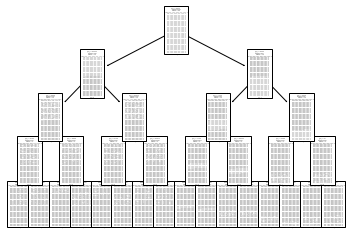

In [12]:
from sklearn import tree
tree.plot_tree(model);

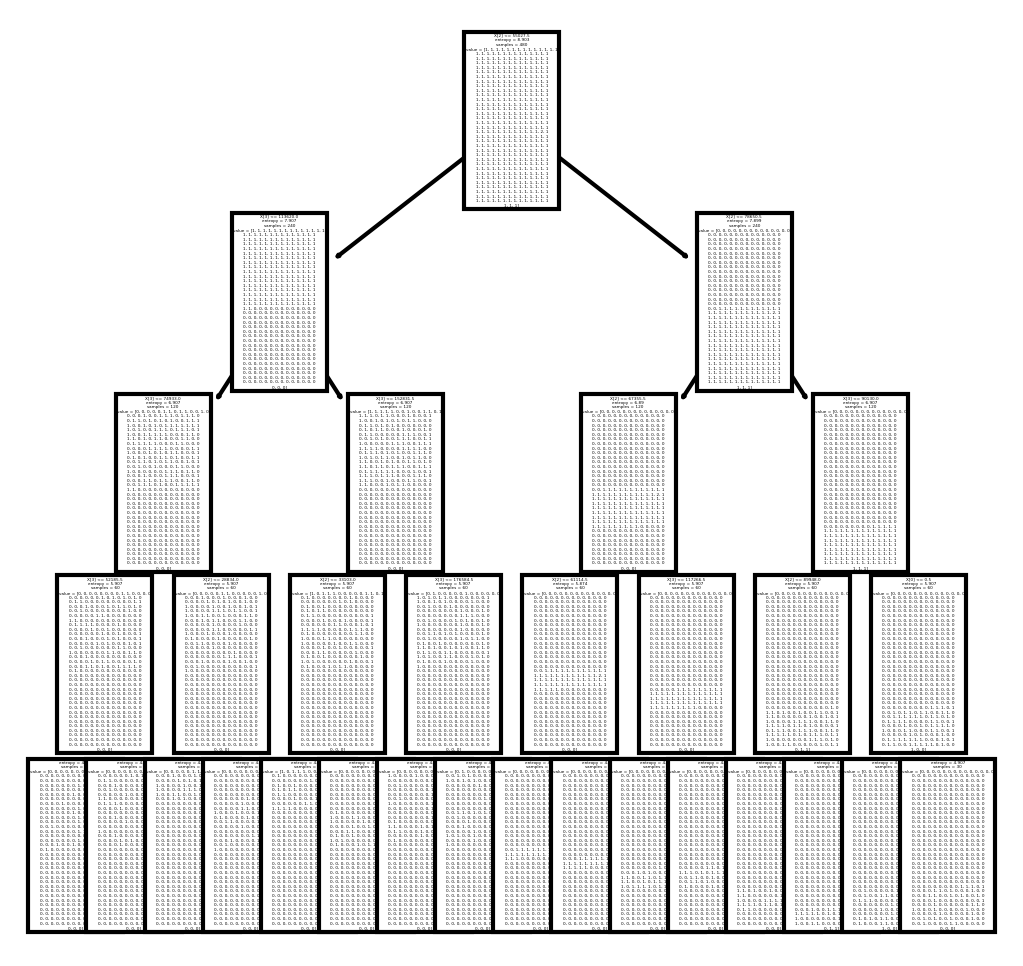

In [13]:
fn=['Undergrad','Marital.Status','Taxable_Income','City.Population','Work.Experience','Urban']
cn=['Bad', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model);

In [14]:
#preducting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

10900    13
10150    12
78728    10
79373     9
90065     9
59689     9
61124     8
68152     8
10163     8
13068     8
28904     8
67628     5
33301     4
10870     4
10455     3
78963     2
dtype: int64

In [15]:
preds

array([61124, 61124, 78963, 79373, 10150, 10900, 90065, 10150, 10900,
       68152, 33301, 10900, 10163, 90065, 10150, 10150, 61124, 10163,
       79373, 10900, 79373, 13068, 13068, 68152, 10150, 28904, 90065,
       78728, 90065, 13068, 10870, 10900, 61124, 33301, 10870, 68152,
       90065, 68152, 67628, 59689, 90065, 10900, 78963, 67628, 79373,
       78728, 78728, 68152, 10150, 10163, 10150, 67628, 78728, 33301,
       59689, 68152, 61124, 10150, 78728, 78728, 59689, 61124, 10163,
       10900, 90065, 61124, 78728, 10870, 10900, 78728, 28904, 10150,
       61124, 13068, 10900, 10150, 78728, 59689, 10900, 28904, 79373,
       59689, 10150, 10900, 13068, 90065, 79373, 59689, 79373, 10150,
       10870, 28904, 67628, 13068, 10163, 10455, 67628, 68152, 28904,
       10900, 28904, 10900, 10163, 28904, 59689, 13068, 33301, 59689,
       10455, 10455, 13068, 10163, 10163, 78728, 68152, 28904, 59689,
       90065, 79373, 79373], dtype=int64)

In [16]:
pd.crosstab(y_test,preds)

col_0,10150,10163,10455,10870,10900,13068,28904,33301,59689,61124,67628,68152,78728,78963,79373,90065
Taxable_Income,,,,,,,,,,,,,,,,
10003,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11794,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11804,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
12514,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12682,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
97957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
98416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [17]:
#building Decision  Tree Classifier(CART) using GINI Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [18]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [19]:
#prediction
pred=model.predict(x_test)
pred

array([61124, 61124, 78963, 79373, 10150, 10900, 90065, 10150, 10900,
       68152, 33301, 10900, 10163, 90065, 10150, 10150, 61124, 10163,
       79373, 10900, 79373, 13068, 13068, 68152, 10150, 28904, 90065,
       78728, 90065, 13068, 10870, 10900, 61124, 33301, 10870, 68152,
       90065, 68152, 67628, 59689, 90065, 10900, 78963, 67628, 79373,
       78728, 78728, 68152, 10150, 10163, 10150, 67628, 78728, 33301,
       59689, 68152, 61124, 10150, 78728, 78728, 59689, 61124, 10163,
       10900, 90065, 61124, 78728, 10870, 10900, 78728, 28904, 10150,
       61124, 13068, 10900, 10150, 78728, 59689, 10900, 28904, 79373,
       59689, 10150, 10900, 13068, 90065, 79373, 59689, 79373, 10150,
       10870, 28904, 67628, 13068, 10163, 10455, 67628, 68152, 28904,
       10900, 28904, 10900, 10163, 28904, 59689, 13068, 33301, 59689,
       10455, 10455, 13068, 10163, 10163, 78728, 68152, 28904, 59689,
       90065, 79373, 79373], dtype=int64)

In [20]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

In [21]:
array = dataset.values
X = array[:,0:5]
Y= array[:,2]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [23]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
#Find the accuracy
model.score(X_test,y_test)

0.9998851431372222